In [ ]:
!pip install keras.applications

     |████████████████████████████████| 51kB 5.1MB/s 


In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
# model = MobileNetV2(
#   weights = 'imagenet',
#   include_top = True,
#   alpha = 1.0)

# model.summary()

# epochs = 20
# img_size = 336

# input_tensor = Input(shape=(img_size, img_size, 3))

# base_model = MobileNetV2(
#     weights='imagenet',
#     include_top = False,
#     input_tensor = input_tensor)

In [ ]:
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 20
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
#imgsize 224
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 20
img_size = 224

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:

for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

output = Dense(5,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Augmented_Data/Splitted/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Augmented_Data/Splitted/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

FileNotFoundError: ignored

In [ ]:

x_batch, y_batch = next(train_generator)

In [ ]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath="/content/drive/MyDrive/Augmented_Data/cassava-aug-mobileNet1.hdf5"

checkpoint = ModelCheckpoint(
     filepath,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 20,
                   callbacks = [checkpoint])

Epoch 1/20
187/187 [==============================] - 5092s 27s/step - loss: 1.8403 - accuracy: 0.2241 - val_loss: 7.8516 - val_accuracy: 0.1855
Epoch 2/20
187/187 [==============================] - 315s 2s/step - loss: 1.5949 - accuracy: 0.2747 - val_loss: 5.3484 - val_accuracy: 0.1848
Epoch 3/20
187/187 [==============================] - 316s 2s/step - loss: 1.5075 - accuracy: 0.3402 - val_loss: 2.4357 - val_accuracy: 0.1855
Epoch 4/20
187/187 [==============================] - 318s 2s/step - loss: 1.4187 - accuracy: 0.4039 - val_loss: 1.8399 - val_accuracy: 0.2690
Epoch 5/20
187/187 [==============================] - 316s 2s/step - loss: 1.3523 - accuracy: 0.4574 - val_loss: 1.5743 - val_accuracy: 0.3730
Epoch 6/20
187/187 [==============================] - 316s 2s/step - loss: 1.2938 - accuracy: 0.4950 - val_loss: 1.3197 - val_accuracy: 0.4674
Epoch 7/20
187/187 [==============================] - 318s 2s/step - loss: 1.2218 - accuracy: 0.5413 - val_loss: 1.2018 - val_accuracy: 0.52

In [ ]:
model.save(filepath="/content/drive/MyDrive/Augmented_Data/cassava-aug-mobileNet1.hdf5")

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [ ]:
img_size=336
test_datagen = ImageDataGenerator(
   
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/Augmented_Data/test',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

Found 200 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
model = keras.models.load_model(filepath)

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="red" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [ ]:
predict = model.predict_generator(valid_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[170  55  11  12  52]
 [ 38 190  20  12  40]
 [  9  21 206  40  24]
 [  7  30  24 225  14]
 [  7  26  13   3 251]]
Confusion matrix, without normalization


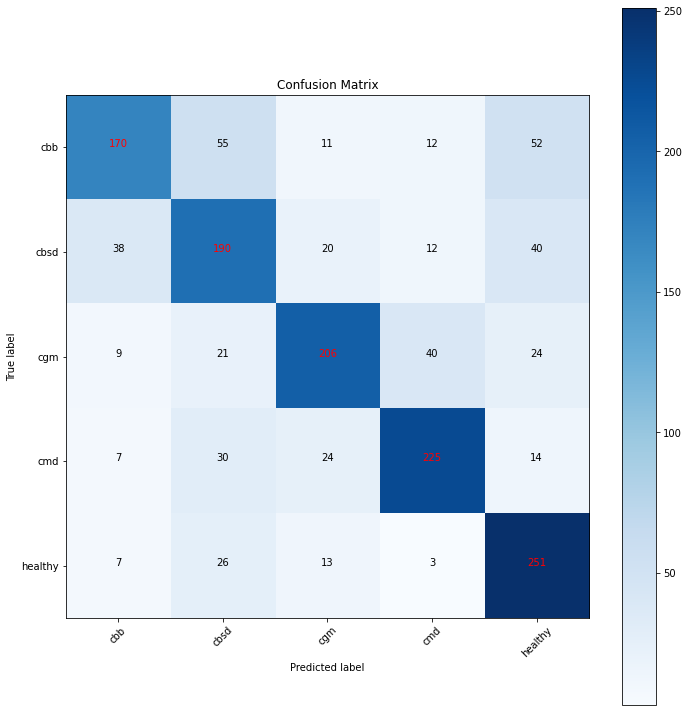

In [ ]:
y_pred = np.argmax(predict, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(valid_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         cbb       0.74      0.57      0.64       300
        cbsd       0.59      0.63      0.61       300
         cgm       0.75      0.69      0.72       300
         cmd       0.77      0.75      0.76       300
     healthy       0.66      0.84      0.74       300

    accuracy                           0.69      1500
   macro avg       0.70      0.69      0.69      1500
weighted avg       0.70      0.69      0.69      1500



# **Resnet again**

In [ ]:
!pip install keras.applications


  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl


In [19]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 144
img_size = 336

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)

for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [ ]:
#img size 224
model = ResNet50(
  weights = 'imagenet',
  include_top = True)

model.summary()

epochs = 144
img_size = 224

input_tensor = Input(shape=(img_size, img_size, 3))

base_model = ResNet50(
    weights='imagenet',
    include_top = False,
    input_tensor = input_tensor)

for layer in base_model.layers:
    layer.trainable = True
    
base_model.layers[0].trainable = False
base_model.layers[1].trainable = False

model = Model(
    inputs = base_model.input,
    outputs = base_model.get_layer(index = -2).output)

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
!pip install keras.attention


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(5,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 6000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:

x_batch, y_batch = next(train_generator)

In [ ]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath="/content/drive/MyDrive/Augmented_Data/cassava-aug-ResNet224.hdf5"

checkpoint = ModelCheckpoint(
     filepath,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 155,
                   callbacks = [checkpoint])

Epoch 1/155
187/187 [==============================] - 1888s 10s/step - loss: 1.7837 - accuracy: 0.1811 - val_loss: 5.5187 - val_accuracy: 0.2038
Epoch 2/155
187/187 [==============================] - 228s 1s/step - loss: 1.6172 - accuracy: 0.2520 - val_loss: 4.2973 - val_accuracy: 0.2045
Epoch 3/155
187/187 [==============================] - 230s 1s/step - loss: 1.5043 - accuracy: 0.3383 - val_loss: 2.0874 - val_accuracy: 0.2242
Epoch 4/155
187/187 [==============================] - 230s 1s/step - loss: 1.4272 - accuracy: 0.3907 - val_loss: 2.2057 - val_accuracy: 0.2643
Epoch 5/155
187/187 [==============================] - 230s 1s/step - loss: 1.3557 - accuracy: 0.4497 - val_loss: 1.6644 - val_accuracy: 0.3295
Epoch 6/155
187/187 [==============================] - 230s 1s/step - loss: 1.3145 - accuracy: 0.4787 - val_loss: 1.2654 - val_accuracy: 0.4776
Epoch 7/155
187/187 [==============================] - 230s 1s/step - loss: 1.2475 - accuracy: 0.5192 - val_loss: 1.1863 - val_accurac

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 3946s 21s/step - loss: 1.7612 - accuracy: 0.1915 - val_loss: 4.3945 - val_accuracy: 0.2038
Epoch 2/144
187/187 [==============================] - 203s 1s/step - loss: 1.5940 - accuracy: 0.2620 - val_loss: 3.6264 - val_accuracy: 0.2031
Epoch 3/144
187/187 [==============================] - 203s 1s/step - loss: 1.5089 - accuracy: 0.3357 - val_loss: 2.1799 - val_accuracy: 0.2031
Epoch 4/144
187/187 [==============================] - 202s 1s/step - loss: 1.4221 - accuracy: 0.3931 - val_loss: 2.0480 - val_accuracy: 0.2344
Epoch 5/144
187/187 [==============================] - 198s 1s/step - loss: 1.3562 - accuracy: 0.4387 - val_loss: 1.7281 - val_accuracy: 0.2643
Epoch 6/144
187/187 [==============================] - 200s 1s/step - loss: 1.2897 - accuracy: 0.4828 - val_loss: 1.3170 - val_accuracy: 0.4293
Epoch 7/144
187/187 [==============================] - 199s 1s/step - loss: 1.2508 - accuracy: 0.5103 - val_loss: 1.1980 - val_accurac

In [17]:
#imgsize224
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 2779s 15s/step - loss: 1.7837 - accuracy: 0.2373 - val_loss: 6.3088 - val_accuracy: 0.2038
Epoch 2/144
187/187 [==============================] - 117s 626ms/step - loss: 1.5922 - accuracy: 0.3059 - val_loss: 4.7774 - val_accuracy: 0.2038
Epoch 3/144
187/187 [==============================] - 117s 624ms/step - loss: 1.5040 - accuracy: 0.3525 - val_loss: 1.9866 - val_accuracy: 0.1501
Epoch 4/144
187/187 [==============================] - 117s 625ms/step - loss: 1.4193 - accuracy: 0.4039 - val_loss: 1.8533 - val_accuracy: 0.2323
Epoch 5/144
187/187 [==============================] - 117s 625ms/step - loss: 1.3463 - accuracy: 0.4378 - val_loss: 1.5787 - val_accuracy: 0.3132
Epoch 6/144
187/187 [==============================] - 116s 622ms/step - loss: 1.2926 - accuracy: 0.4761 - val_loss: 1.3408 - val_accuracy: 0.4327
Epoch 7/144
187/187 [==============================] - 117s 623ms/step - loss: 1.2481 - accuracy: 0.4904 - val_loss: 1.

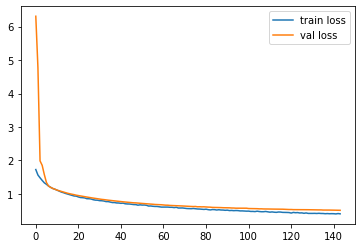

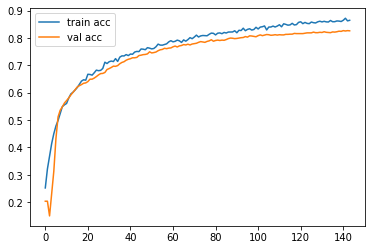

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_cassresnet_loss224')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_cassresnet_acc224')

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 100,
                   callbacks = [checkpoint])

Epoch 1/100
187/187 [==============================] - 3976s 21s/step - loss: 1.8095 - accuracy: 0.1895 - val_loss: 4.8780 - val_accuracy: 0.1848
Epoch 2/100
187/187 [==============================] - 372s 2s/step - loss: 1.6592 - accuracy: 0.2309 - val_loss: 3.4937 - val_accuracy: 0.1848
Epoch 3/100
187/187 [==============================] - 372s 2s/step - loss: 1.5437 - accuracy: 0.3204 - val_loss: 1.9981 - val_accuracy: 0.1549
Epoch 4/100
187/187 [==============================] - 371s 2s/step - loss: 1.4540 - accuracy: 0.3925 - val_loss: 1.8125 - val_accuracy: 0.2120
Epoch 5/100
187/187 [==============================] - 372s 2s/step - loss: 1.3782 - accuracy: 0.4387 - val_loss: 1.5252 - val_accuracy: 0.3213
Epoch 6/100
187/187 [==============================] - 372s 2s/step - loss: 1.3184 - accuracy: 0.4821 - val_loss: 1.2789 - val_accuracy: 0.4878
Epoch 7/100
187/187 [==============================] - 372s 2s/step - loss: 1.2657 - accuracy: 0.5157 - val_loss: 1.1869 - val_accurac

In [ ]:
filepath1="/content/drive/MyDrive/cassava-aug-resnet224.hdf5"
filepath2="/content/drive/MyDrive/casssava-aug-resnet224.h5"


model.save(filepath1)
model.save(filepath2)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 100,
                   callbacks = [checkpoint])

Epoch 1/100
187/187 [==============================] - 1998s 11s/step - loss: 1.7793 - accuracy: 0.2485 - val_loss: 3.1209 - val_accuracy: 0.1943
Epoch 2/100
187/187 [==============================] - 231s 1s/step - loss: 1.5505 - accuracy: 0.3261 - val_loss: 1.9780 - val_accuracy: 0.1712
Epoch 3/100
187/187 [==============================] - 231s 1s/step - loss: 1.4431 - accuracy: 0.4021 - val_loss: 1.9518 - val_accuracy: 0.2154
Epoch 4/100
187/187 [==============================] - 231s 1s/step - loss: 1.3821 - accuracy: 0.4359 - val_loss: 1.7534 - val_accuracy: 0.2649
Epoch 5/100
187/187 [==============================] - 233s 1s/step - loss: 1.3082 - accuracy: 0.4840 - val_loss: 1.4079 - val_accuracy: 0.3981
Epoch 6/100
187/187 [==============================] - 233s 1s/step - loss: 1.2593 - accuracy: 0.5203 - val_loss: 1.2664 - val_accuracy: 0.4986
Epoch 7/100
187/187 [==============================] - 231s 1s/step - loss: 1.2102 - accuracy: 0.5471 - val_loss: 1.1932 - val_accurac

KeyboardInterrupt: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [ ]:
img_size=336
test_datagen = ImageDataGenerator(
   
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/test',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 200 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
filepath1="/content/drive/MyDrive/cassava-aug-resnet224.hdf5"
model = keras.models.load_model(filepath1)

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [ ]:
predict = model.predict_generator(valid_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predict1=model.predict_generator(test_generator)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[230  31   4  13  22]
 [  9 262   6  13  10]
 [  1  16 248  21  14]
 [  2  19   3 273   3]
 [  1  17   4   3 275]]
Confusion matrix, without normalization


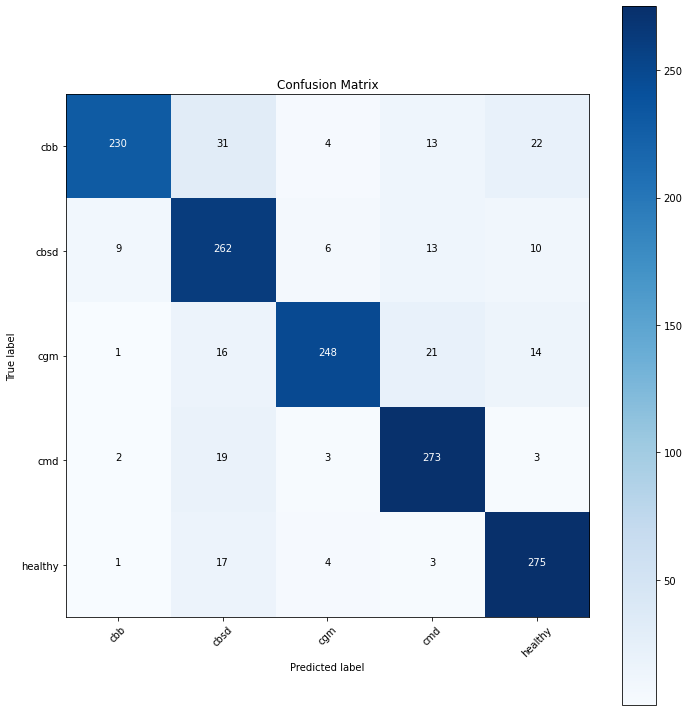

In [ ]:
y_pred = np.argmax(predict, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(valid_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')




In [ ]:
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         cbb       0.95      0.77      0.85       300
        cbsd       0.76      0.87      0.81       300
         cgm       0.94      0.83      0.88       300
         cmd       0.85      0.91      0.88       300
     healthy       0.85      0.92      0.88       300

    accuracy                           0.86      1500
   macro avg       0.87      0.86      0.86      1500
weighted avg       0.87      0.86      0.86      1500



Confusion Matrix
[[26  9  1  1  3]
 [ 0 39  0  0  1]
 [ 0  1 38  0  1]
 [ 0  1  0 39  0]
 [ 2  8  0  2 28]]
Confusion matrix, without normalization


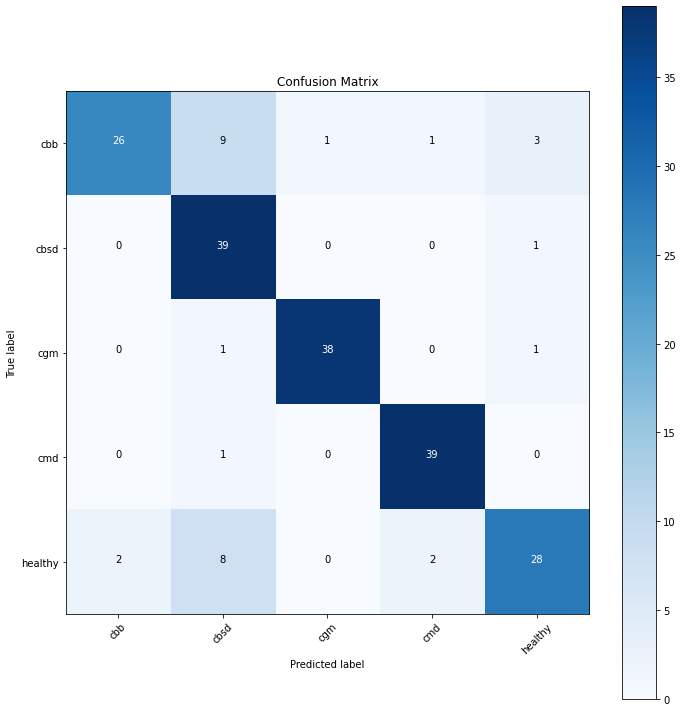

In [ ]:
y_pred = np.argmax(predict1, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         cbb       0.93      0.65      0.76        40
        cbsd       0.67      0.97      0.80        40
         cgm       0.97      0.95      0.96        40
         cmd       0.93      0.97      0.95        40
     healthy       0.85      0.70      0.77        40

    accuracy                           0.85       200
   macro avg       0.87      0.85      0.85       200
weighted avg       0.87      0.85      0.85       200



In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: ignored

### **Attention**

In [ ]:
!pip install keras.applications

     |████████████████████████████████| 51kB 7.8MB/s 


In [ ]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D,Dense, multiply,Conv2D,Lambda,Reshape,Add,Activation,Concatenate
import keras.backend as K
import keras
def CBAM(input, ratio=0.8, kernel_size=7):
  #Determine the channel
  channel =  input.shape[-1]

  #Channel Attention
  #Shared Network
  shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
  shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
  #GAP
  GAP_feature = GlobalAveragePooling2D()(input)
  GAP_feature = Reshape((1, 1, channel))(GAP_feature)
  GAP_feature = shared_layer_one(GAP_feature)
  GAP_feature = shared_layer_two(GAP_feature)
  #GMP
  max_pool = GlobalMaxPooling2D()(input)
  max_pool = Reshape((1,1,channel))(max_pool)
  max_pool = shared_layer_one(max_pool)
  max_pool = shared_layer_two(max_pool)
  
  cbam_feature = Add()([GAP_feature,max_pool])
  cbam_feature = Activation('sigmoid')(cbam_feature)
  cbam_feature = multiply([input, cbam_feature])
  
  #Spatial Attention
  avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
  max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
  concat = Concatenate(axis=3)([avg_pool, max_pool])
  cbam_feature1 = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)
  cbam_feature = multiply([cbam_feature, cbam_feature1])
  return cbam_feature
  


In [ ]:
import warnings

#from keras.applications.imagenet_utils import _obtain_input_shape
from keras.layers import Input
from keras import layers
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.2/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'


def identity_block(input_tensor, kernel_size, filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'keras.., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size,
               padding='same', name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = layers.add([x, input_tensor])
    x = Activation('relu')(x)
    return x


def conv_block(input_tensor, kernel_size, filters, stage, block, strides=(2, 2)):
    """A block that has a conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'keras.., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    Note that from stage 3, the first conv layer at main path is with strides=(2,2)
    And the shortcut should have strides=(2,2) as well
    """
    filters1, filters2, filters3 = filters
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    x = Conv2D(filters1, (1, 1), strides=strides,
               name=conv_name_base + '2a')(input_tensor)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2a')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters2, kernel_size, padding='same',
               name=conv_name_base + '2b')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2b')(x)
    x = Activation('relu')(x)

    x = Conv2D(filters3, (1, 1), name=conv_name_base + '2c')(x)
    x = BatchNormalization(axis=bn_axis, name=bn_name_base + '2c')(x)

    x = CBAM(x)

    shortcut = Conv2D(filters3, (1, 1), strides=strides,
                      name=conv_name_base + '1')(input_tensor)
    shortcut = BatchNormalization(axis=bn_axis, name=bn_name_base + '1')(shortcut)

    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    return x

In [ ]:
def ResNet50(include_top=True, weights='imagenet',
             input_tensor=None, input_shape=None,
             pooling=None,
             classes=1000):
    if weights not in {'imagenet', None}:
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization) or `imagenet` '
                         '(pre-training on ImageNet).')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    if K.image_data_format() == 'channels_last':
        bn_axis = 3
    else:
        bn_axis = 1

    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same', name='conv1')(img_input)
    x = BatchNormalization(axis=bn_axis, name='bn_conv1')(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding="same")(x)

    x = conv_block(x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1))
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='b')
    x = identity_block(x, 3, [64, 64, 256], stage=2, block='c')

    x = conv_block(x, 3, [128, 128, 512], stage=3, block='a')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='b')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='c')
    x = identity_block(x, 3, [128, 128, 512], stage=3, block='d')

    x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e')
    x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f')

    x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b')
    x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c')

#     x = AveragePooling2D((7, 7), name='avg_pool')(x)

#     if include_top:
#         x = Flatten()(x)
#         x = Dense(classes, activation='softmax', name='fc1000')(x)
#     else:
#         if pooling == 'avg':
#             x = GlobalAveragePooling2D()(x)
#         elif pooling == 'max':
#             x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='resnet50')

    # load weights
    if weights == 'imagenet':
        if include_top:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    md5_hash='a7b3fe01876f51b976af0dea6bc144eb')
        else:
            weights_path = get_file('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    md5_hash='a268eb855778b3df3c7506639542a6af')
        model.load_weights(weights_path,by_name=True)
    return model

In [ ]:
 #resnet_base = ResNet50(input_shape=(256,256,3), include_top=False)
 resnet_base = ResNet50(input_shape=(336,336,3), include_top=False)

94658560/94653016 [==============================] - 1s 0us/step


In [ ]:
resnet_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 168, 168, 64) 0           bn_conv1[0][0]                   
___________________________________________________________________________________________

In [ ]:
x = resnet_base.output
x = GlobalAveragePooling2D()(x)
output = Dense(5,activation='softmax')(x)

model = Model(inputs=resnet_base.input,outputs=output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 168, 168, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 168, 168, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 168, 168, 64) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
img_size=336
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 6000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [ ]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath1="/content/drive/MyDrive/cassava_attention_ResNet.hdf5"

filepath2="/content/drive/MyDrive/cassava_attention_ResNet.h5"

checkpoint = ModelCheckpoint(
     filepath1,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

model.save(filepath1)
model.save(filepath2)


import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Resnet_Atten_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/Resnet_Atten_acc')


Epoch 1/144
187/187 [==============================] - 1923s 10s/step - loss: 1.6758 - accuracy: 0.2085 - val_loss: 2.7651 - val_accuracy: 0.2038
Epoch 2/144
187/187 [==============================] - 241s 1s/step - loss: 1.5954 - accuracy: 0.2800 - val_loss: 5.0392 - val_accuracy: 0.2038
Epoch 3/144
187/187 [==============================] - 241s 1s/step - loss: 1.5464 - accuracy: 0.3100 - val_loss: 2.3400 - val_accuracy: 0.1916
Epoch 4/144
187/187 [==============================] - 241s 1s/step - loss: 1.4900 - accuracy: 0.3519 - val_loss: 1.6751 - val_accuracy: 0.2439
Epoch 5/144
187/187 [==============================] - 241s 1s/step - loss: 1.4386 - accuracy: 0.4110 - val_loss: 1.4827 - val_accuracy: 0.3587
Epoch 6/144
187/187 [==============================] - 241s 1s/step - loss: 1.4006 - accuracy: 0.4326 - val_loss: 1.3753 - val_accuracy: 0.4538
Epoch 7/144
187/187 [==============================] - 241s 1s/step - loss: 1.3766 - accuracy: 0.4503 - val_loss: 1.3182 - val_accurac

In [ ]:
from tensorflow import keras
classifier = keras.models.load_model("/content/drive/MyDrive/casssava-aug-resnet.h5")

In [ ]:
class_dict = train_generator.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}
['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


Following is our prediction:


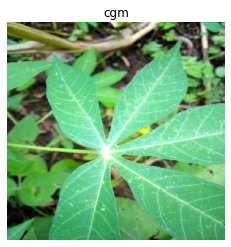

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/cassava_aug_data/test/test_cgm/173849826.jpg"
new_img = image.load_img(image_path, target_size=(336, 336))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

     
        
##Another way
#img_class = classifier.predict_classes(img)
#img_prob = classifier.predict_proba(img)
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()